### Draw scan path images for target user and stimuli

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('')), 'src', 'stimuli'))
import stimuli
from load_data import load_data

In [2]:
data_type = "MVC"
data_file = "MVC.tsv" if data_type == "MVC" else "SVS.tsv"
data = load_data(data_file)
data.head()

,x,y,velocity,angle,mfcc,left_pupil,right_pupil,avg_pupil,eyetype,fixation_duration,...,saccade_dispersion,saccade_velocity,saccade_amplitude,path_length,fixation_count,saccade_count,reaction_time,session,participant,stimuli_index
0,"[975.0, 973.0, 964.0, 968.0, 970.0, 972.0...","[530.0, 528.0, 533.0, 532.0, 531.0, 526.0...","[339.4112549695428, 1235.4756169184402, 494....","[-2.356194490192345, 1.2924966677897842, 1.5...","[484198.8410569887, 230671.5620274861, 54556...","[3.107, 3.105, 3.104, 3.116, 3.114, 3.094...","[3.062, 3.044, 3.056, 3.066, 3.057, 3.041...","[3.076, 3.081, 3.082, 3.08, 3.083, 3.075,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[633.0, 83.0, 675.0]",...,"[226.0, 595.0]","[202.52730841612072, 479.2823627649834]","[8.50614695347707, 23.964118138249173]",952.978759,3,2,0.358333,1,0,0
1,"[988.0, 989.0, 989.0, 987.0, 983.0, 982.0...","[487.0, 488.0, 488.0, 491.0, 490.0, 492.0...","[169.7056274847714, 0.0, 432.6661530556788, ...","[0.7853981633974483, 0.7853981633974483, 1.3...","[661683.2973562105, 321195.16228981456, 9288...","[3.532, 3.544, 3.547, 3.543, 3.545, 3.562...","[3.533, 3.532, 3.527, 3.542, 3.534, 3.541...","[3.534, 3.538, 3.539, 3.54, 3.544, 3.55, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[542.0, 150.0, 83.0, 267.0]",...,"[27.0, 258.0, 708.0]","[95.33078781905635, 180.07910895123484, 523....","[1.6206233929239582, 7.563322575951864, 26.1...",1108.301563,4,3,0.116667,1,0,1
2,"[970.0, 977.0, 972.0, 976.0, 977.0, 974.0...","[508.0, 505.0, 509.0, 508.0, 507.0, 508.0...","[913.892772703669, 768.3749084919418, 494.77...","[-0.4048917862850834, 2.871743497651324, 3.1...","[183607.87382183364, 56277.7654661798, -1082...","[3.48, 3.479, 3.481, 3.488, 3.49, 3.497, ...","[3.464, 3.454, 3.466, 3.471, 3.469, 3.471...","[3.471, 3.472, 3.473, 3.479, 3.48, 3.482,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[725.0, 75.0, 83.0, 183.0, 117.0]",...,"[171.0, 194.0, 94.0, 34.0]","[137.83457639333216, 271.48518142639, 210.12...","[5.789052208519951, 8.95901098707087, 5.2530...",701.558661,5,4,0.258333,1,0,2
3,"[966.0, 965.0, 964.0, 966.0, 965.0, 970.0...","[437.0, 438.0, 435.0, 439.0, 440.0, 443.0...","[169.7056274847714, 379.4733192202056, 536.6...","[2.356194490192345, 2.0344439357957027, 0.92...","[573467.8109983339, 235752.57767752695, 2993...","[3.325, 3.323, 3.32, 3.321, 3.329, 3.325,...","[3.274, 3.269, 3.247, 3.269, 3.266, 3.273...","[3.294, 3.295, 3.296, 3.296, 3.295, 3.296...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[350.0, 133.0, 283.0]",...,"[535.0, 418.0, 104.0]","[144.97229976031798, nan, nan]","[3.62430749400795, nan, nan]",1151.929879,3,3,0.375000,1,0,3
4,"[953.0, 956.0, 959.0, 954.0, 952.0, 952.0...","[559.0, 557.0, 559.0, 556.0, 556.0, 556.0...","[432.6661530556788, 432.6661530556788, 699.7...","[-0.5880026035475675, 1.1760052070951348, 2....","[248701.24470166865, 72056.30262720207, 2252...","[3.263, 3.263, 3.255, 3.257, 3.273, 3.267...","[3.288, 3.283, 3.291, 3.306, 3.298, 3.307...","[3.269, 3.273, 3.277, 3.28, 3.287, 3.289,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[1025.0, 125.0, 375.0]",...,"[249.0, 28.0]","[366.5277936155317, 116.7578397717286]","[12.095417189312547, 1.9848832761193864]",537.107378,3,2,0.700000,1,0,4


In [3]:
def get_gaze_points_and_bg(data_type, participant, stimuli_index):
    x_list, y_list = data[(data['participant'] == participant) & (data['stimuli_index'] == stimuli_index)][['x', 'y']].values[0].T
    x_list = [float(item.strip()) for item in x_list]
    y_list = [float(item.strip()) for item in y_list]
    bg = stimuli.index2image(stimuli_index, data_type)
    return x_list, y_list, bg

In [4]:
# Here, change parameter if you want to get scan path
participant_list = [5, 8, 27, 32]   # participant number
stimuliIndexNum = 0
# ------------------------------------------------#

[859.0, 863.0, 860.0, 861.0, 862.0, 860.0, 865.0, 864.0, 859.0, 859.0, 858.0, 841.0, 841.0, 838.0, 841.0, 838.0, 843.0, 843.0, 844.0, 843.0, 846.0, 844.0, 844.0, 846.0, 847.0, 846.0, 848.0, 845.0, 843.0, 848.0, 845.0, 845.0, 846.0, 856.0, 852.0, 845.0, 846.0, 846.0, 851.0, 848.0, 854.0, 847.0, 854.0, 846.0, 849.0, 852.0, 851.0, 850.0, 837.0, 765.0, 721.0, 717.0, 709.0, 703.0, 710.0, 715.0, 712.0, 712.0, 712.0, 717.0, 719.0, 717.0, 720.0, 724.0, 720.0, 721.0, 717.0, 721.0, 720.0, 715.0, 723.0, 723.0, 720.0, 715.0, 722.0, 723.0, 722.0, 719.0, 720.0, 720.0, 718.0, 723.0, 724.0, 720.0]
[947.0, 953.0, 971.0, 963.0, 919.0, 962.0, 968.0, 949.0, 927.0, 949.0, 893.0, 946.0, 953.0, 969.0, 930.0, 921.0, 950.0, 921.0, 948.0, 960.0, 949.0, 953.0, 948.0, 964.0, 951.0, 949.0, 929.0, 940.0, 940.0, 836.0, 812.0, 757.0, 747.0, 748.0, 747.0, 754.0, 749.0, 750.0, 754.0, 751.0, 751.0, 750.0, 750.0, 745.0, 751.0, 748.0, 746.0, 747.0, 748.0, 742.0, 745.0, 750.0, 751.0, 746.0, 751.0, 751.0, 788.0, 896.0, 1006

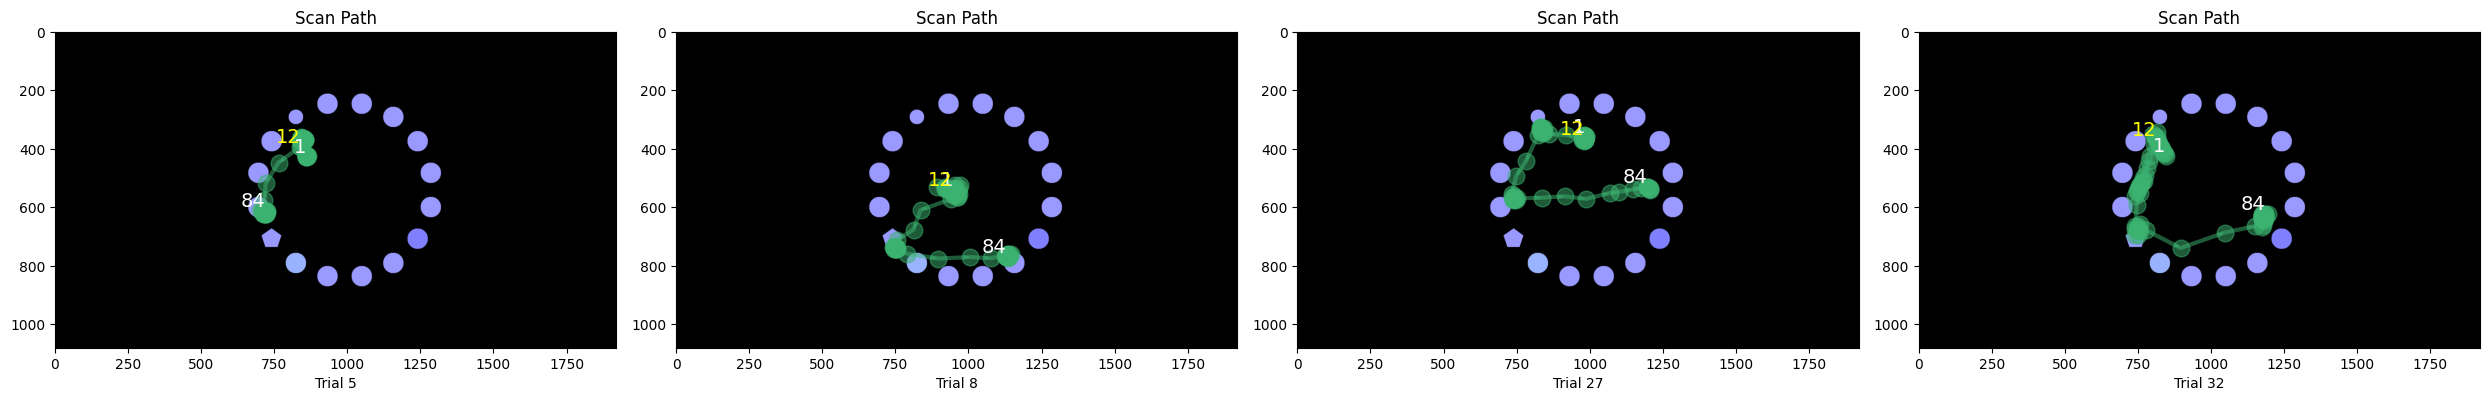

In [5]:
# get information
X_LIST = []
Y_LIST = []
BG_LIST = []
for participant in participant_list:
    # x_coords, y_coords, bg = get_gaze_points_and_bg(data_type, participant, stimuliIndexNum)
    x_coords, y_coords, bg = get_gaze_points_and_bg(data_type, participant,stimuliIndexNum)
    X_LIST.append(x_coords)
    Y_LIST.append(y_coords)
    BG_LIST.append(bg)


# for visualize
fig, axes = plt.subplots(1, len(participant_list), figsize=(25, 7))
if len(participant_list) == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    ax.imshow(BG_LIST[i], cmap='gray')  # Display the image
    ax.set_title('Scan Path')
    ax.set_xlim(0, 1920)
    ax.set_ylim(0, 1080)
    ax.invert_yaxis()


for i, idx in enumerate(participant_list):
    # x_coords, y_coords, bg = get_gaze_points_and_bg(idx)
    x_coords = X_LIST[i]
    y_coords = Y_LIST[i]
    x_coords = x_coords[:84]
    y_coords = y_coords[:84]
    print(x_coords)
    
    # Draw scan path
    axes[i].plot(x_coords, y_coords, marker='o', alpha=0.5, color='mediumseagreen', linewidth=3, markersize=12)
    
            # Add arrows between consecutive points to indicate direction
    for j in range(len(x_coords) - 1):
        dx = x_coords[j + 1] - x_coords[j]
        dy = y_coords[j + 1] - y_coords[j]
        axes[i].arrow(x_coords[j], y_coords[j], dx, dy, shape='full', lw=0, length_includes_head=True, head_width=15, color='mediumseagreen', alpha=0.5)

    # Add indices for ALL points
    # for j, (x, y) in enumerate(zip(x_coords, y_coords)):
    #     axes[i].text(x, y, str(j+1), fontsize=8, ha='right', va='bottom', color='white')  # Add point index

    # Add indices for the first and last points
    axes[i].text(x_coords[0], y_coords[0], '1', fontsize=14, ha='right', va='bottom', color='white')                        # 1st point
    axes[i].text(x_coords[11], y_coords[11], '12', fontsize=14, ha='right', va='bottom', color='yellow')      # 12-th point
    axes[i].text(x_coords[-1], y_coords[-1], len(x_coords), fontsize=14, ha='right', va='bottom', color='white')       # last (84) point

    axes[i].set_xlabel(f'Trial {idx}')

plt.tight_layout()
plt.show()